In [ ]:
# 지도학습
 - 정답을 알고 있는 데이터를 활용해 컴퓨터를 학습

# 비지도학습
 - 지도학습처럼 정답이 있는 데이터가 아니라 정답이 없는 데이터로만 학습

# 강화학습
 - '시행착오(trial and error)'를 통해 발전해 나가는 과정
 - 순차적 의사결정 문제에서 누적 보상을 최대화 하기 위해 '시행착오'를 통해 행동을 교정하는 학습 과정
 - '행동과 보상을 조합해 기계 스스로 배워나가는 것'

 - 강화학습의 목적
    에이전트(Agent)가 환경을 탐색하면서 얻는 보상들의 합을 최대화하는 '최적의 행동양식' 또는 '정책'을 학습하는 것
    
 - 순차적 행동 결정 문제
    강화학습은 결정을 순차적으로 내려야하는 문제에 적용
    
 - 순차적 행동 결정 문제의 구성 요소
    - 상태(state), 행동(action), 보상(reward), 정책(policy)

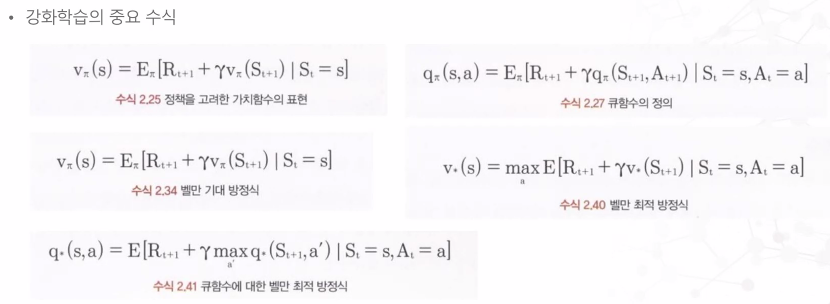

In [ ]:
# 다이나믹 프로그래밍
- 문제를 각각의 작은 문제로 나누어 해결한 결과를 저장해줬다가 나중에 큰 문제의 결과와 합하여 풀이하는 알고리즘
- 문제의 최적 해결 방법이 부분 문제에 대한 최적 해결 방법으로 구성되는 경우의 문제, 최적 부분 구조를 갖고 있는 문제를 풀이할 수 있음

In [14]:
# 피보나치수
# bottom-up 방식

dp = [0 for x in range(100)]

def fib(n):
    dp[0] = 0
    dp[1] = 1
    
    for i in range(2, n+1):
        dp[i] = dp[i-1] + dp[i-2]
    return dp[n]

fib(10)

55

In [91]:
# 재귀함수
# top-down 방식

dp = [0 for x in range(100)]

def fib(n):
    if n <= 1:
        return n
    
    if dp[n]:
        return dp[n]
    
    dp[n] = fib(n-1) + fib(n-2)
    return dp[n]

fib(10)
# fib(9) + fib(8)
# fib(8) + fib(7) + fib(8)

55

In [89]:
%%timeit
def step(n):
    dp = [0 for x in range(n)]
    
    dp[0] = 1
    dp[1] = 2
    if n >= 3:
        for i in range(3, n+1):
            dp[i-1] = dp[i-3] + dp[i-2]
    return dp[n-1]

step(3)

888 ns ± 2.72 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [88]:
%%timeit
def climb(n):
    if n == 1:
        return 1
    
    if n == 2:
        return 2
    
    return climb(n-1) + climb(n-2)

climb(3)

435 ns ± 3.85 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [90]:
%%timeit
from collections import defaultdict

dp = defaultdict(int)

def climb2(n):
    if n <= 2:
        return n
    
    if dp[n]:
        return dp[n]
    
    dp[n] = climb2(n-1) + climb(n-2)
    return dp[n]

climb2(3)

1.1 µs ± 6.11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [107]:
from collections import OrderedDict

a = {}

a['가'] = 10
a['나'] = 20
a['카'] = 30
a['다'] = 50

b = OrderedDict(a)
b

OrderedDict([('가', 10), ('나', 20), ('카', 30), ('다', 50)])

In [119]:
target = [10, 7, 1, 10, 12]

def steal(target):
    if not target:
        return 0
    
    if len(target) <= 2:
        return max(target)
        
    dp = OrderedDict()
    dp[0], dp[1] = target[0], max(target[0], target[1])
    
    for i in range(2, len(target)):
        dp[i] = max(dp[i-1], dp[i-2] + target[i])
        
    return dp.popitem()[1]
    
        
steal(target)

23

In [120]:
# packing, unpacking
a, b = [1, 2]

def func1():
    return 'dummy', 7

_,d = func1()
_

'dummy'